<a href="https://colab.research.google.com/github/Ahirshson02/deeplearning-ocr-rnn/blob/main/OCR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RESEARCH**

# The code cell below is the implementation for basic OCR. Not likely to be able to be utilized for handwritten text recognition.

In [ ]:
od.download('https://www.kaggle.com/datasets/dhruvildave/english-handwritten-characters-dataset')
# requires kaggle username and API key, can be obtained from kaggle account settings as a json file.

Loaded label mapping from english.csv
Loading images from a single folder: ./english-handwritten-characters-dataset/Img
Number of images loaded: 3410
Number of labels loaded: 3410
Number of classes identified: 62


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model compilation complete. Ready for training if data is loaded.
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.0143 - loss: 4.1315 - val_accuracy: 0.0264 - val_loss: 4.1134
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.0389 - loss: 3.9706 - val_accuracy: 0.1202 - val_loss: 3.4296
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.1605 - loss: 3.1529 - val_accuracy: 0.2727 - val_loss: 2.6126
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 157ms/step - accuracy: 0.2933 - loss: 2.4606 - val_accuracy: 0.4018 - val_loss: 2.0828
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 134ms/step - accuracy: 0.4815 - loss: 1.7677 - val_accuracy: 0.5015 - val_loss: 1.7106
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 136ms/step - accuracy: 0.6293 - loss: 1.2056 - val_accuracy: 0.5645 - val_loss: 1.3967
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 132ms/step - accuracy: 0.7098 - loss: 0.9018 - val_accuracy: 0.6452 - val_loss: 1.1955
Epoch 8/20
86/86 ━━━━━━━━━━━━━━

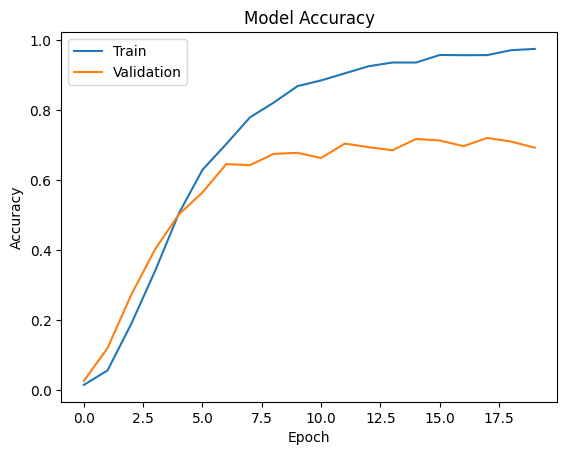

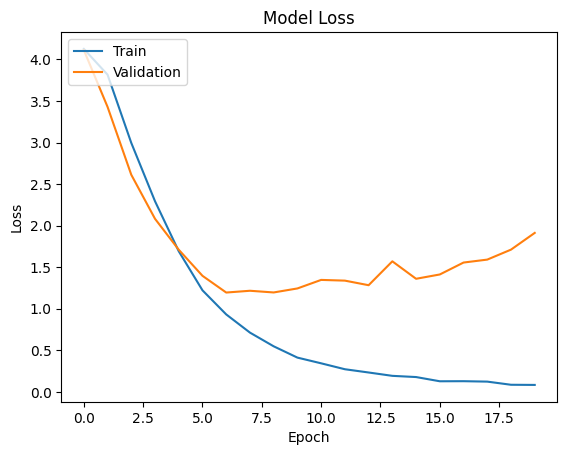

In [29]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.optimizers import Adam
import os
import cv2
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

images = []
labels = []

# Assuming the dataset is already downloaded

# Set the path to the directory containing all images
# Path points directly to a folder with images
image_folder_path = './english-handwritten-characters-dataset/Img'

# Load the english.csv file to potentially map filenames to characters
csv_path = './english-handwritten-characters-dataset/english.csv'
try:
    label_df = pd.read_csv(csv_path)
    # Assuming the CSV has columns like 'image' and 'label' based on variable inspection
    label_mapping = dict(zip(label_df['image'], label_df['label']))
    print("Loaded label mapping from english.csv")
except FileNotFoundError:
    print(f"Warning: {csv_path} not found. Labels will be extracted from filenames if possible.")
    label_mapping = {}


print(f"Loading images from a single folder: {image_folder_path}")

# Iterate through the files in the single image folder
try:
    for image_name in os.listdir(image_folder_path):
        image_path = os.path.join(image_folder_path, image_name)
        # Check if it's a file
        if os.path.isfile(image_path):
            img = cv2.imread(image_path)
            if img is not None: # Add a check to ensure the image was loaded successfully
                img = cv2.resize(img, (64,64))
                img = np.array(img, dtype=np.float32)
                img = img/255
                images.append(img)

                # Attempt to get label from filename or mapping
                # The filename format is like 'Img/imgNNN-NNN.png'
                # We need to match this format to the 'image' column in the CSV
                csv_image_name = f'Img/{image_name}'
                if csv_image_name in label_mapping:
                    labels.append(label_mapping[csv_image_name])
                else:
                     # Attempt to extract the part after the hyphen and before the extension as a fallback
                    try:
                        label_code = image_name.split('-')[1].split('.')[0]
                        labels.append(label_code)
                        print(f"Warning: Image {csv_image_name} not found in CSV, using label from filename: {label_code}")
                    except IndexError:
                        print(f"Warning: Could not extract label from filename: {image_name} and not found in CSV.")
                        labels.append("unknown") # Assign a default label if extraction fails


            else:
                print(f"Warning: Could not load image {image_path}")

except FileNotFoundError:
    print(f"Error: Image folder not found: {image_folder_path}")


print(f"Number of images loaded: {len(images)}")
print(f"Number of labels loaded: {len(labels)}")

if len(images) == 0:
    print("Error: No images were loaded. Please check the path to the single image folder.")
else:
    X = np.array(images)
    y = np.array(labels)

    # Continue with preprocessing and model training as before
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)
    from sklearn.utils import shuffle
    X_sh, y_sh = shuffle(X, y, random_state=42)

    # Assuming the model architecture and compilation are the same
    # You might need to adjust the output layer if the number of classes is different
    num_classes = len(le.classes_)
    print(f"Number of classes identified: {num_classes}")

    model = Sequential()
    model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax')) # Use num_classes here


    adam_optimizer = Adam(learning_rate=0.001)

    model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print("Model compilation complete. Ready for training if data is loaded.")


    history = model.fit(X_sh, y_sh ,validation_split=0.2, epochs=20, batch_size=32)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


# New dataset for handwritten text below.



In [49]:
od.download('https://www.kaggle.com/datasets/nibinv23/iam-handwriting-word-database')
# requires kaggle username and API key, can be obtained from kaggle account settings as a json file.

Skipping, found downloaded files in "./iam-handwriting-word-database" (use force=True to force download)


# This code is the preliminary implementation for handwritten character recognition, built upon concepts learned from the OCR model research.

Known as HTR (Handwritten Text Recognition), this model looks to combine layers from both CNN and RNN to accurately parse and sequence data into setences. The CNN acts as a feature extractor and the RNN will be used for sequence processing.

# DATA LOADING & PREPROCESSING

In [50]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Path to the downloaded dataset
dataset_path = './iam-handwriting-word-database'
words_transcription_file = os.path.join(dataset_path, 'words_new.txt')
words_images_base_path = os.path.join(dataset_path, 'iam_words')

# Load transcriptions
transcriptions = {}
with open(words_transcription_file, 'r') as f:
    for line in f:
        if line.strip() and not line.strip().startswith('#'): # Skip empty lines and comments
            parts = line.strip().split(' ', 1) # Split only on the first space
            if len(parts) == 2:
                image_id, transcription = parts
                # Clean the transcription if necessary (e.g., remove unwanted characters)
                transcriptions[image_id] = transcription.replace('|', ' ') # Example cleaning

print(f"Loaded {len(transcriptions)} transcriptions.")

# Prepare lists for image paths and labels
image_paths = []
labels = []

print("Gathering image paths and labels...")
# Add a counter to print only a few examples
count = 0
max_examples = 10

for image_id, transcription in transcriptions.items():
    # Construct the full path based on image_id format and the provided sample path
    # Example image_id from words_new.txt: a01-000u-00-00
    # Confirmed actual path structure: iam_words/words/writer_id/writer_id-page_num/image_id.png
    # e.g., iam_words/words/a01/a01-000u/a01-000u-00-00.png
    parts = image_id.split('-')
    if len(parts) >= 4: # Ensure enough parts for the expected structure
        writer_id = parts[0] # Full writer ID (e.g., a01)
        writer_page_num = parts[0] + '-' + parts[1] # Writer ID and page number (e.g., a01-000u)
        image_filename = f"{image_id}.png" # Full image filename

        relative_path_corrected = os.path.join(
            'words', # Include the 'words' subdirectory
            writer_id,
            writer_page_num,
            image_filename
        )

        full_image_path = os.path.join(words_images_base_path, relative_path_corrected)


        # Add print statements for debugging paths
        if count < max_examples:
            print(f"Checking path for image ID {image_id}: {full_image_path}")
            print(f"Does path exist? {os.path.exists(full_image_path)}")
            count += 1

        # Stop printing after max_examples to avoid excessive output
        if count == max_examples:
          print("...")


        if os.path.exists(full_image_path):
            image_paths.append(full_image_path)
            labels.append(transcription)
        # else:
            # Uncomment for debugging missing files:
            # if count < max_examples + 5: # Print a few more missing paths
            #    print(f"Path not found for image ID {image_id}: {full_image_path}")


print(f"Found {len(image_paths)} images with corresponding transcriptions.")

# Create a character vocabulary and mapping
all_chars = sorted(list(set(''.join(labels))))
char_to_num = tf.keras.layers.StringLookup(
    vocabulary=all_chars, mask_token=None, oov_token="[UNK]"
)
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, oov_token="[UNK]", invert=True
)
print(f"Vocabulary size: {len(all_chars)}")
print(f"Vocabulary: {all_chars}")

# Preprocessing function for images and labels
def process_data(image_path, label):
    # Ensure image_path is a string tensor
    image_path = tf.cast(image_path, tf.string) # Explicitly cast to string

    # Image preprocessing
    img = tf.io.read_file(image_path)
    img = tf.io.decode_png(img, channels=1) # Decode as grayscale
    img = tf.image.convert_image_dtype(img, tf.float32) # Normalize to [0, 1]

    # Resize image (maintain aspect ratio and pad)
    img_height = 64 # Keep consistent height
    img_width = 256 # Choose a suitable fixed width
    height, width = tf.shape(img)[0], tf.shape(img)[1]
    scale = tf.cast(img_height, tf.float32) / tf.cast(height, tf.float32) # Cast both to float32 before division
    img_width_new = tf.cast(tf.cast(width, tf.float32) * scale, tf.int32)
    img = tf.image.resize(img, [img_height, img_width_new])
    img = tf.image.pad_to_bounding_box(img, 0, 0, img_height, img_width)


    # Label preprocessing (convert text to numerical sequence)
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))

    return img, label

# Create TensorFlow Datasets
# Split data into training and validation sets
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

train_ds = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels))

# Apply preprocessing and batching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(process_data, num_parallel_calls=AUTOTUNE).batch(32).cache().prefetch(AUTOTUNE)
val_ds = val_ds.map(process_data, num_parallel_calls=AUTOTUNE).batch(32).cache().prefetch(AUTOTUNE)

print("\nData preprocessing complete. Created TensorFlow Datasets.")
print(f"Training dataset size: {tf.data.experimental.cardinality(train_ds).numpy()} batches")
print(f"Validation dataset size: {tf.data.experimental.cardinality(val_ds).numpy()} batches")

# Now you can use train_ds and val_ds for training your HTR model

Streaming output truncated to the last 5000 lines.
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
.

# NEXT STEPS



*   Define model structure using elements from CNN and RNN
*   Training and validation
*   Test with a sample dataset
*   Polish and documentation







# MODEL TEMPLATE

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, Dense, GRU, Bidirectional, Input, Activation, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

# Assuming img_height, img_width, and vocabulary size (num_classes) from preprocessing are available
# img_height = 64
# img_width = 256 # Example width
# num_classes = len(all_chars) + 1 # +1 for CTC blank label

# Define the input shape
input_shape = (img_height, img_width, 1) # Images are grayscale

# --- CNN Feature Extraction Part (Simplified) ---
input_img = Input(shape=input_shape, name='image_input')

# Simplified Convolutional layers
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) # Fewer filters
x = MaxPooling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x) # Fewer filters
x = MaxPooling2D((2, 2))(x)

# You can add one more layer if needed, but keeping it minimal for now
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)


# Reshape the output for the RNN layers
# The target shape is (batch_size, sequence_length, feature_dimension)
# The sequence length will be the width of the last pooling layer's output
# The feature dimension will be height * number of filters in the last conv layer

# Calculate the shape after CNN layers (assuming fixed input width and 2 MaxPooling layers)
cnn_output_height = img_height // (2*2)
cnn_output_width = img_width // (2*2)
cnn_output_filters = 32 # Number of filters in the last Conv2D layer

# Calculate the feature dimension per sequence step
feature_dimension = cnn_output_height * cnn_output_filters

# Reshape for RNN (batch_size, sequence_length, feature_dimension)
# The sequence length is the width of the CNN output
x = Reshape(target_shape=(cnn_output_width, feature_dimension), name='reshape')(x)

# --- RNN Sequence Processing Part (Simplified using one Bidirectional GRU) ---

gru_units = 64 # Fewer units
x = Bidirectional(GRU(gru_units, return_sequences=True, kernel_initializer='he_normal'), name='gru1')(x)
# Removing the second GRU layer for simplicity

# --- Output Layer for CTC ---

# The output layer predicts the probability distribution over characters for each step in the sequence
# num_classes is the size of your vocabulary + 1 for the blank label used by CTC
output = Dense(num_classes, activation='softmax', name='dense_output')(x)

# Define the model
model = Model(inputs=input_img, outputs=output)

# --- CTC Loss Function ---
# CTC loss requires the model's output, the true labels, the input sequence length, and the label sequence length

def ctc_lambda_func(args):
    y_pred, y_true, input_length, label_length = args
    # The CTC loss function is more stable with softmax activation
    # y_pred = y_pred[:, :, :] # Slice to remove the last dimension if it's 1 (not needed with softmax)
    return K.ctc_batch_cost(y_true, y_pred, input_length, label_length)

# Define inputs for the CTC loss
labels = Input(name='the_labels', shape=[None], dtype='float32') # True labels as sequences
input_length = Input(name='input_length', shape=[1], dtype='int64')   # Length of the input sequence (width of CNN output)
label_length = Input(name='label_length', shape=[1], dtype='int64')   # Length of the true label sequence

# Define the training model (includes all inputs needed for CTC loss calculation)
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([output, labels, input_length, label_length])
training_model = Model(inputs=[input_img, labels, input_length, label_length], outputs=loss_out)

# Compile the training model
adam_optimizer = Adam(learning_rate=0.001) # You can adjust the learning rate
training_model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=adam_optimizer)

# Note: The 'model' is used for prediction after training
# The 'training_model' is used for training with the CTC loss

# You will need to create a custom data generator to feed data to the training_model
# The generator should yield batches of ([image_input, the_labels, input_length, label_length], dummy_output_for_loss)
# where dummy_output_for_loss can be zeros or None since the loss is calculated within the model


print("Simplified HTR Model Template Defined (using minimal CNN and one Bidirectional GRU layer).")
training_model.summary()